# Laboratorio 7

* Asuma que las operaciones no requieren alta precisión.
* Presente su solución con el nombre `lab7_codigoPUCP.ipynb`

In [30]:
import numpy
ns = 2**numpy.arange(5,15)

a) Implementar (en un único archivo) cuatro funciones en C que acumule el producto interno de dos arreglos números reales. Solo puede emplear un único bucle `for`. En la primera función realizar la acumulación elemento a elemento, en la segunda acumule en bloques de 2 elementos, en la tercera acumule en bloques de 4 elementos, y en la cuarta acumule en bloques de 8 elementos. (2.0 ptos)

In [31]:
%%file parte_a.c
#include <stdio.h>
#include <stdint.h>
double acumular (double* arr1, double* arr2, unsigned long long N){
    double producto = 0.0;
    for (int i = 0; i < N; i++){
        producto += arr1[i]*arr2[i];
    }
    return producto;
}

double acumular_2(double* arr1, double* arr2, unsigned long long N){
    double producto = 0.0;
    for(int i= 0; i <N; i += 2){
        
        producto += arr1[i]*arr2[i] + arr1[i+1]*arr2[i+1];
        
    }
    return producto;

}

double acumular_4(double* arr1, double* arr2, unsigned long long N){
    double producto = 0.0;
    for(int i= 0; i <N; i += 4){
        producto += arr1[i]*arr2[i] + arr1[i+1]*arr2[i+1] + arr1[i+2]*arr2[i+2] + arr1[i+3]*arr2[i+3];
       
    }
    return producto;

}

double acumular_8(double* arr1, double* arr2, unsigned long long N){
    double producto = 0.0;
    for(int i= 0; i <N; i += 8){

        producto += arr1[i]*arr2[i] + arr1[i+1]*arr2[i+1] + arr1[i+2]*arr2[i+2] + arr1[i+3]*arr2[i+3] + arr1[i+4]*arr2[i+4] + arr1[i+5]*arr2[i+5] + arr1[i+6]*arr2[i+6] + arr1[i+7]*arr2[i+7];      
    }
    return producto;

}




Writing parte_a.c


b) Coloque el comando para generar la librería dinámica del ítem (a) y genere la librería dinámica. (0.25 ptos)

In [32]:
! gcc -c parte_a.c

In [33]:
! gcc -shared parte_a.o -o parte_a.so

c) Implemente una función que vincule la librería dinámica generada en el ítem (b) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las cuatro funciones configuradas listas para su uso. (0.5 ptos)

In [8]:
import ctypes

In [34]:
def ctypes_funciones():
    
    libfile = './parte_a.so'

    lib = ctypes.CDLL(libfile)

    lib.acumular.argtypes = [ numpy.ctypeslib.ndpointer(dtype=numpy.double),numpy.ctypeslib.ndpointer(dtype=numpy.double),ctypes.c_ulonglong]
    lib.acumular.restype = ctypes.c_double
    lib.acumular_2.argtypes = [ numpy.ctypeslib.ndpointer(dtype=numpy.double),numpy.ctypeslib.ndpointer(dtype=numpy.double),ctypes.c_ulonglong]
    lib.acumular_2.restype = ctypes.c_double
    lib.acumular_4.argtypes = [ numpy.ctypeslib.ndpointer(dtype=numpy.double),numpy.ctypeslib.ndpointer(dtype=numpy.double),ctypes.c_ulonglong]
    lib.acumular_4.restype = ctypes.c_double
    lib.acumular_8.argtypes = [ numpy.ctypeslib.ndpointer(dtype=numpy.double),numpy.ctypeslib.ndpointer(dtype=numpy.double),ctypes.c_ulonglong]
    lib.acumular_8.restype = ctypes.c_double

    return lib.acumular, lib.acumular_2, lib.acumular_4, lib.acumular_8

d) Haga una instancia de las cuatro funciones a partir de su función en el ítem (c) (0.25 ptos)

In [35]:
c_acumular = ctypes_funciones()

e) Pruebe todas sus funciones obtenidas en el ítem (d) para el menor de los valores de `ns`, y muestre que dan el mismo resultado. Completar la información para generar dos arreglos.(1.25 ptos)

In [36]:
n = ns[0]
a = numpy.random.rand(n)
b = numpy.random.rand(n)

In [37]:
c_acumular[0](a, b, a.size)

7.03919918169039

In [38]:
c_acumular[1](a, b, a.size)

7.039199181690392

In [39]:
c_acumular[2](a, b, a.size)

7.039199181690391

In [40]:
c_acumular[3](a, b, a.size)

7.039199181690391

f) Pruebe todas sus funciones obtenidas en el ítem (d) para el mayor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. Completar nuevamente los arreglos a y b (1.25 ptos)

In [41]:
n = ns[-1]
a = numpy.random.rand(n)
b = numpy.random.rand(n)

In [42]:
c_acumular[0](a, b, a.size)

4124.330815139754

In [43]:
c_acumular[1](a, b, a.size)

4124.330815139757

In [44]:
c_acumular[2](a, b, a.size)

4124.33081513976

In [45]:
c_acumular[3](a, b, a.size)

4124.3308151397605

g) Realice 50 mediciones de tiempo para todas sus funciones, y para todos los valores de `ns`. El valor representativo de las 50 mediciones será la mediana. (0.5 ptos)

In [46]:
import time

In [47]:
import statistics

In [48]:
lista_acumular_N = []
lista_acumular_2_N = []
lista_acumular_4_N = []
lista_acumular_8_N = []
for n in ns:
    a = numpy.random.rand(n)
    b = numpy.random.rand(n)
        
    iteraciones = 50
    lista_ac = []
    lista_ac2 = []
    lista_ac4 = []
    lista_ac8 = []

    for j in range(iteraciones):
        tic1 = time.perf_counter()
        c_acumular[0](a, b, a.size)
        tic2 = time.perf_counter()
        c_acumular[1](a, b, a.size)
        tic3 = time.perf_counter()
        c_acumular[2](a, b, a.size)
        tic4 = time.perf_counter()
        c_acumular[3](a, b, a.size)
        toc = time.perf_counter()
        lista_ac.append(tic2-tic1)
        lista_ac2.append(tic3-tic2)
        lista_ac4.append(tic4-tic3)
        lista_ac8.append(toc-tic4)
        
    lista_acumular_N.append(statistics.median(lista_ac))
    lista_acumular_2_N.append(statistics.median(lista_ac2))
    lista_acumular_4_N.append(statistics.median(lista_ac4))
    lista_acumular_8_N.append(statistics.median(lista_ac8))

h) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

In [49]:
import matplotlib.pyplot as plt


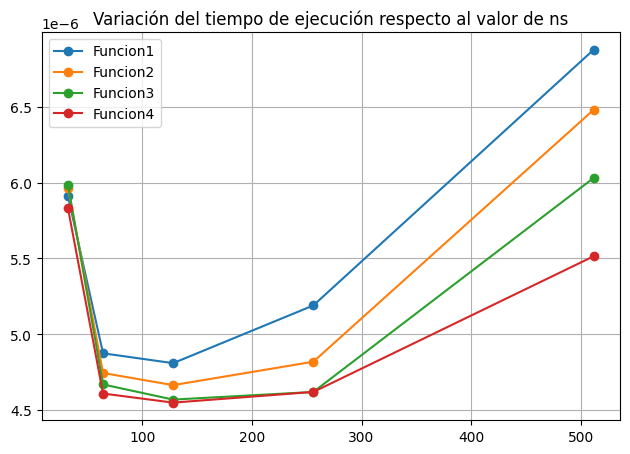

In [50]:
plt.plot(ns[:5], lista_acumular_N[:5],'-o', label='Funcion1')
plt.plot(ns[:5], lista_acumular_2_N[:5],'-o', label='Funcion2')
plt.plot(ns[:5], lista_acumular_4_N[:5],'-o', label='Funcion3')
plt.plot(ns[:5], lista_acumular_8_N[:5],'-o', label='Funcion4')
plt.legend()
plt.grid(True)
plt.title(f'Variación del tiempo de ejecución respecto al valor de ns')
plt.tight_layout()

i) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

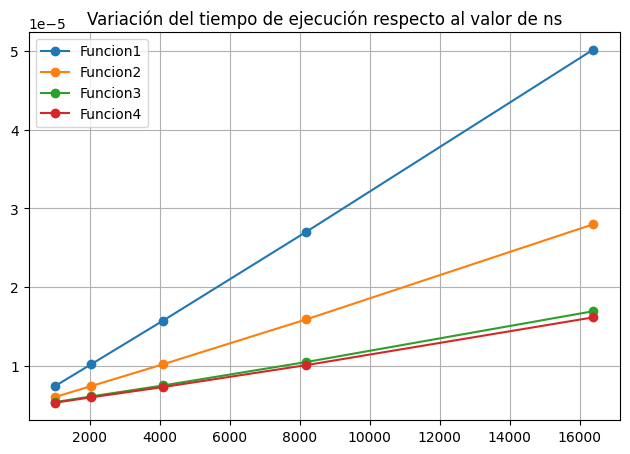

In [51]:
plt.plot(ns[-5:], lista_acumular_N[-5:],'-o', label='Funcion1')
plt.plot(ns[-5:], lista_acumular_2_N[-5:],'-o', label='Funcion2')
plt.plot(ns[-5:], lista_acumular_4_N[-5:],'-o', label='Funcion3')
plt.plot(ns[-5:], lista_acumular_8_N[-5:],'-o', label='Funcion4')
plt.legend()
plt.grid(True)
plt.title(f'Variación del tiempo de ejecución respecto al valor de ns')
plt.tight_layout()

j) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

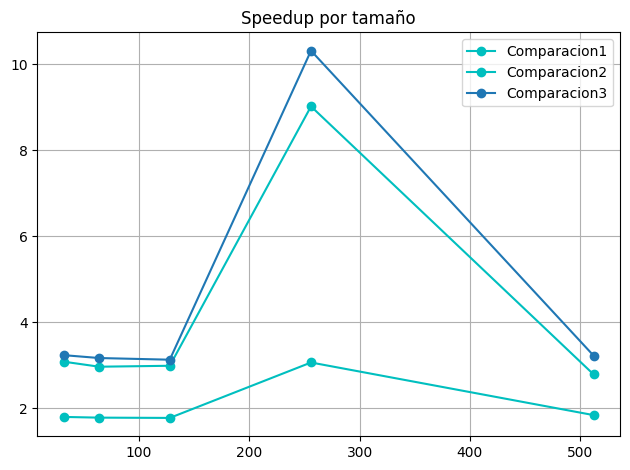

In [54]:
plt.plot(ns[:5],numpy.asarray (lista_ac[:5])/ numpy.asarray(lista_ac2[:5]), '-co', label = 'Comparacion1')
plt.plot(ns[:5],numpy.asarray (lista_ac[:5])/ numpy.asarray(lista_ac4[:5]), '-co', label = 'Comparacion2')
plt.plot(ns[:5],numpy.asarray (lista_ac[:5])/ numpy.asarray(lista_ac8[:5]), '-o', label = 'Comparacion3')
plt.legend()
plt.grid(True)
plt.title('Speedup por tamaño')
plt.tight_layout()

k) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

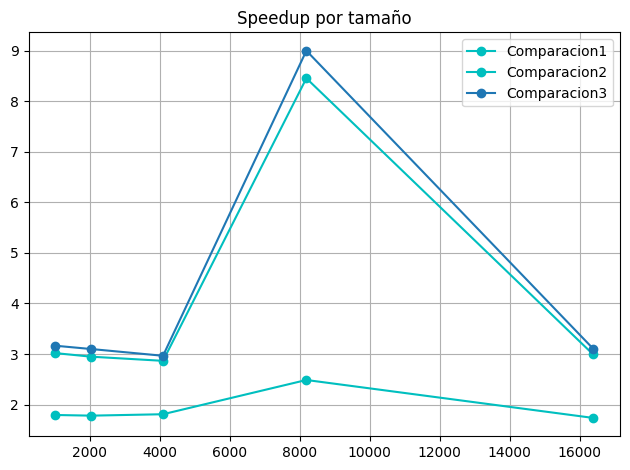

In [55]:
plt.plot(ns[-5:],numpy.asarray (lista_ac[-5:])/ numpy.asarray(lista_ac2[-5:]), '-co', label = 'Comparacion1')
plt.plot(ns[-5:],numpy.asarray (lista_ac[-5:])/ numpy.asarray(lista_ac4[-5:]), '-co', label = 'Comparacion2')
plt.plot(ns[-5:],numpy.asarray (lista_ac[-5:])/ numpy.asarray(lista_ac8[-5:]), '-o', label = 'Comparacion3')
plt.legend()
plt.grid(True)
plt.title('Speedup por tamaño')
plt.tight_layout()

l) Extraer las características de la memoria caché de su computador (0.5)

In [56]:
! lscpu | grep "cache"

L1d cache:                          128 KiB (4 instances)
L1i cache:                          128 KiB (4 instances)
L2 cache:                           2 MiB (4 instances)
L3 cache:                           64 MiB (4 instances)


m) Explique sus resultados de las implementaciones empleando conceptos de memoria caché. (3.5 ptos)

L1d caché(está diseñada para almacenar datos) y L1i(está diseñada para alamcenar instrucciones) forman parte de la L1 caché la cual  se aprecia que tiene 256 KiB en total. Esta memoria caché puede ser mejor utilizada por la función 'acumular' ya que de todas las funciones es la que cuenta con bloques de datos mas pequeños.

L2 Caché,como se puede observar es más grande que L1 pero a su vez es más lenta. Las operaciones con bloques de datos más grandes como 'acumular_2' o 'acumular_4' se pueden beneficiar de su mayor tamaño.

Y por último la L3 caché es la que cuenta con mayor tamaño de todas y a su vez es la más lenta de todas. Esta memoria podría ser aprovechada con la funcion 'acumular_8' ya que cuenta con bloques de datos mas grandes que las otras funciones.